### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.simplefilter('ignore')

### Reading and Understanding Data

In [2]:
df = pd.read_csv("wine-clustering.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [4]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [6]:
[i for i in df.columns if df[i].dtypes != 'int64']

['Alcohol',
 'Malic_Acid',
 'Ash',
 'Ash_Alcanity',
 'Total_Phenols',
 'Flavanoids',
 'Nonflavanoid_Phenols',
 'Proanthocyanins',
 'Color_Intensity',
 'Hue',
 'OD280']

In [7]:
continous = [i for i in df.columns if df[i].dtypes != 'int64']

### Data Visualization

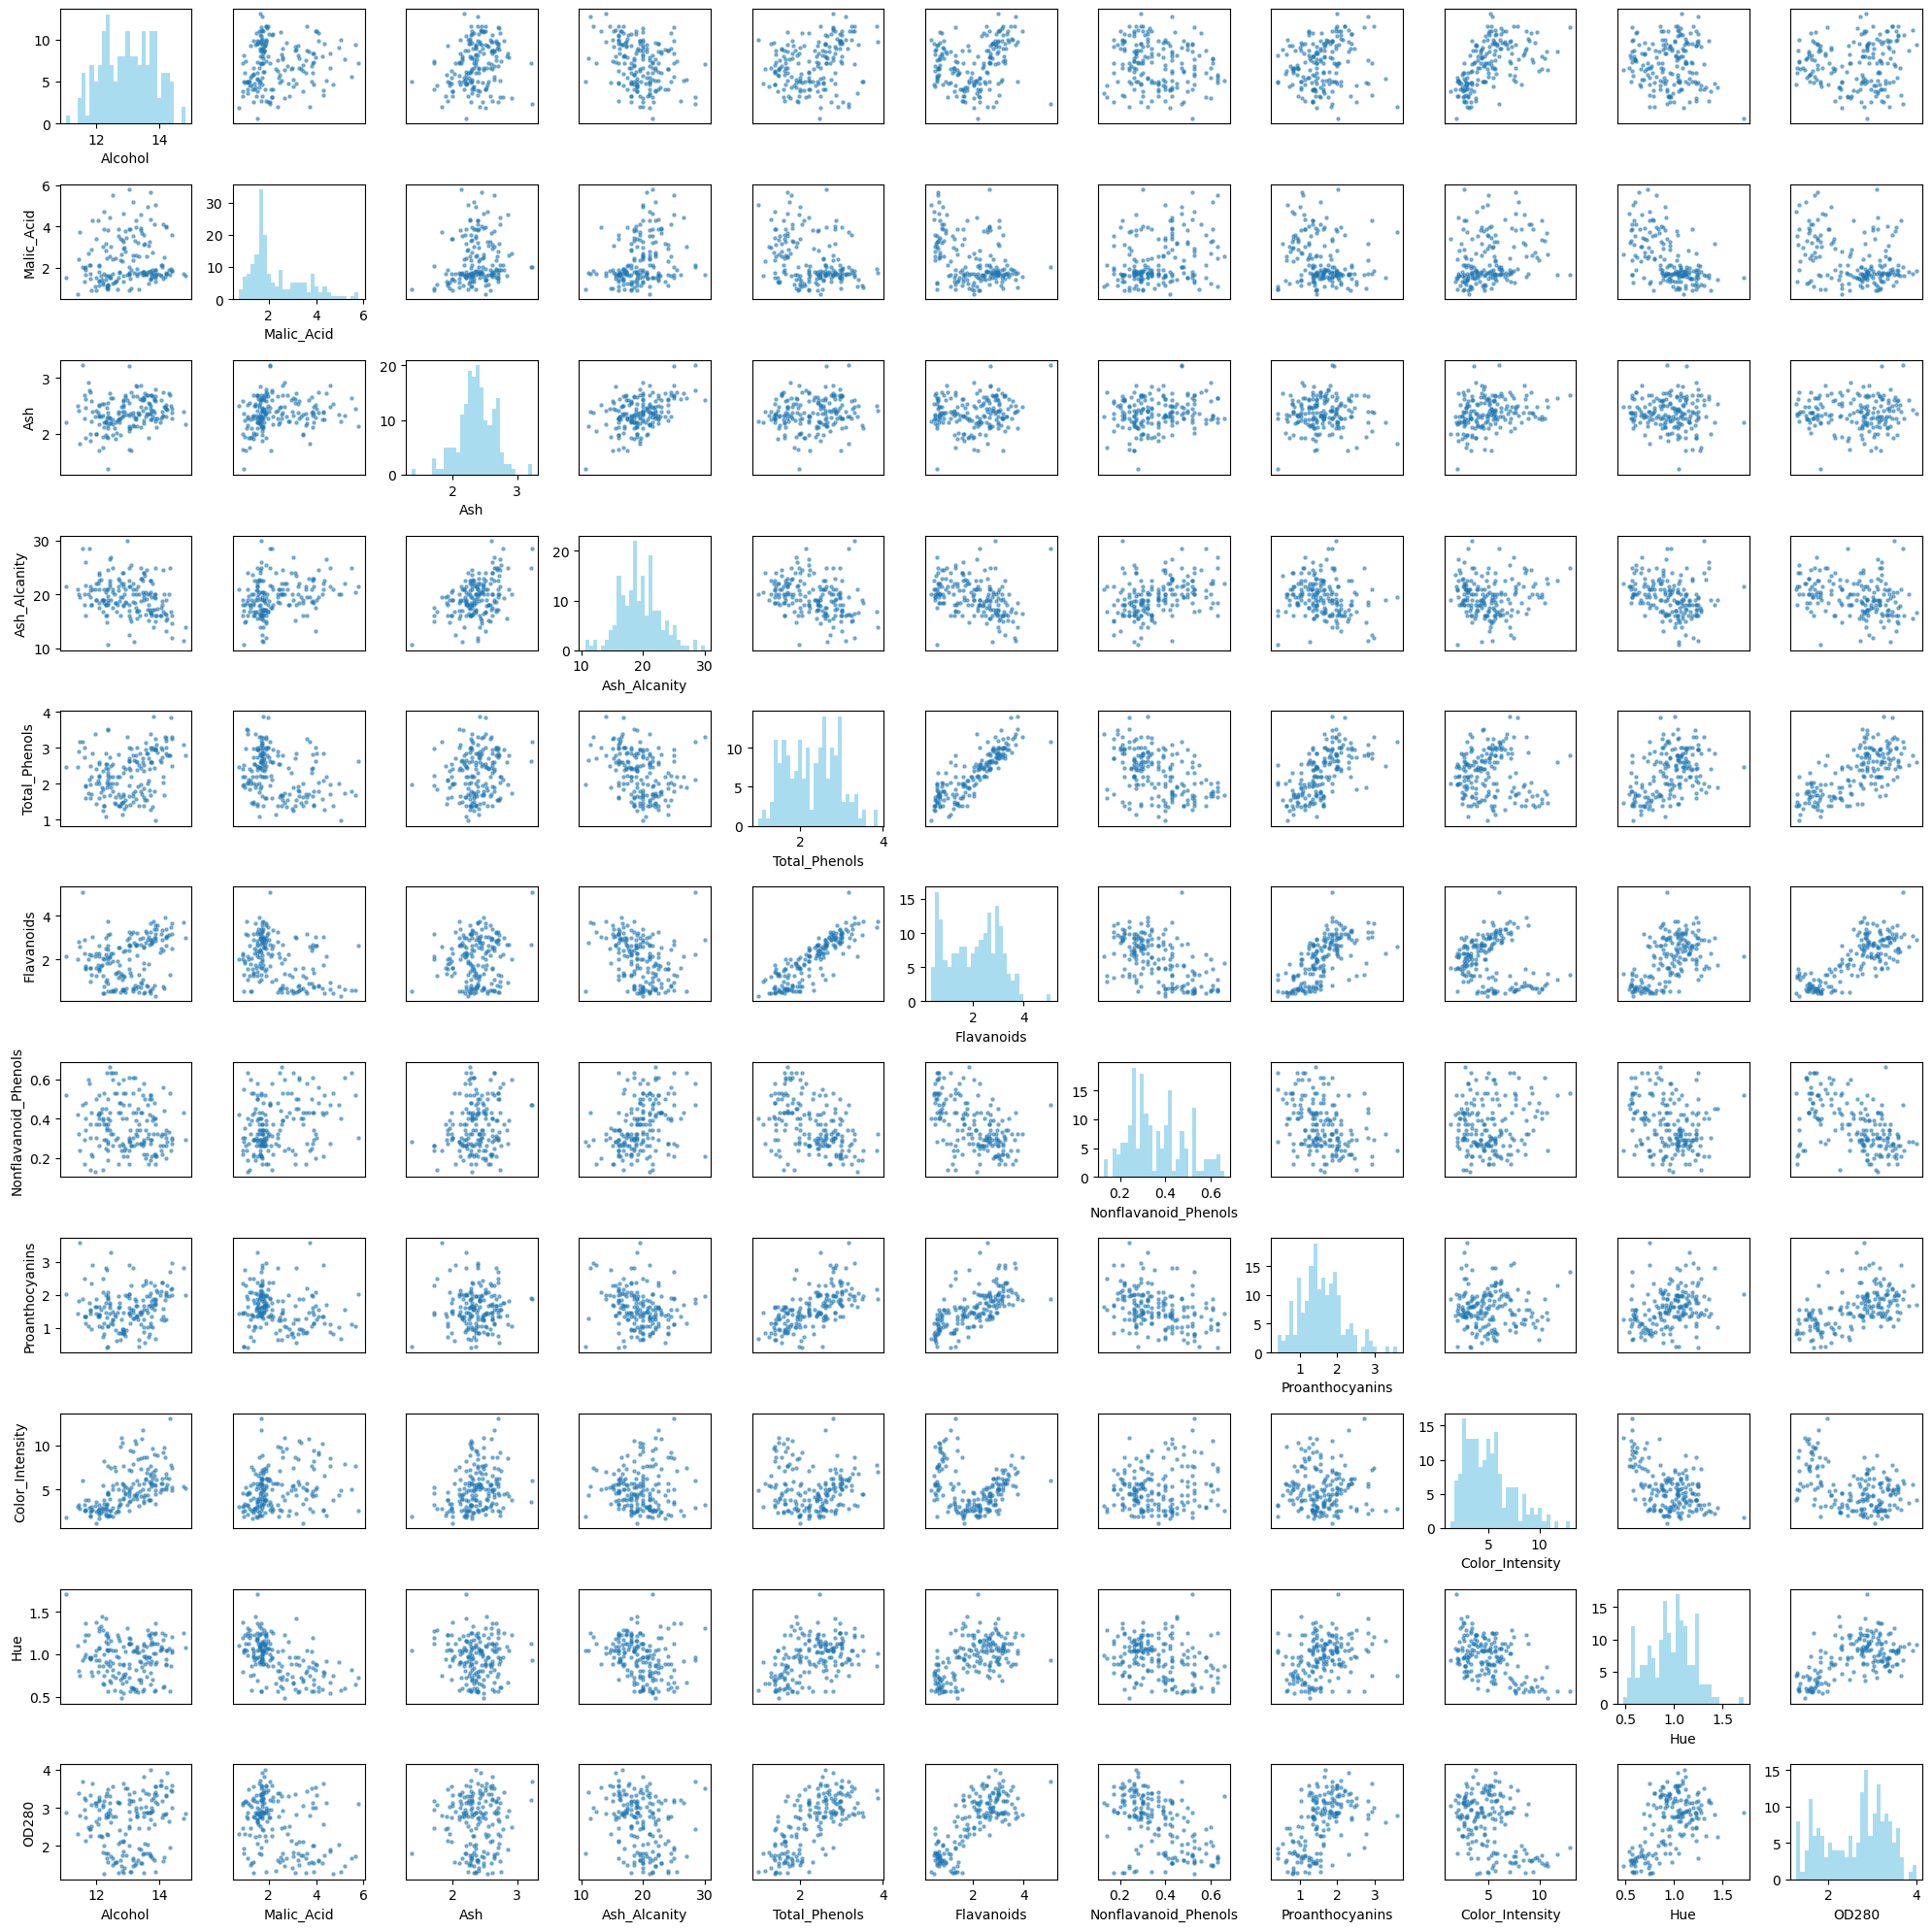

In [8]:
# Create subplots
fig, axes = plt.subplots(nrows=len(continous), ncols=len(continous), figsize=(20, 20))

for i, var1 in enumerate(continous):
    for j, var2 in enumerate(continous):
        if i == j:
            # Plot histogram for diagonal elements
            axes[i, j].hist(df[var1], bins=30, color='skyblue', alpha=0.7)
           
            axes[i, j].set_xlabel(var1)
        else:
            # Scatter plot for off-diagonal elements
            axes[i, j].scatter(df[var2], df[var1], alpha=0.5, s=5)
           
            if i == len(continous) - 1:
                axes[i, j].set_xlabel(var2)
            else:
                axes[i, j].set_xticks([])
            
            if j == 0:
                axes[i, j].set_ylabel(var1)
            else:
                axes[i, j].set_yticks([])

plt.tight_layout()
plt.show()

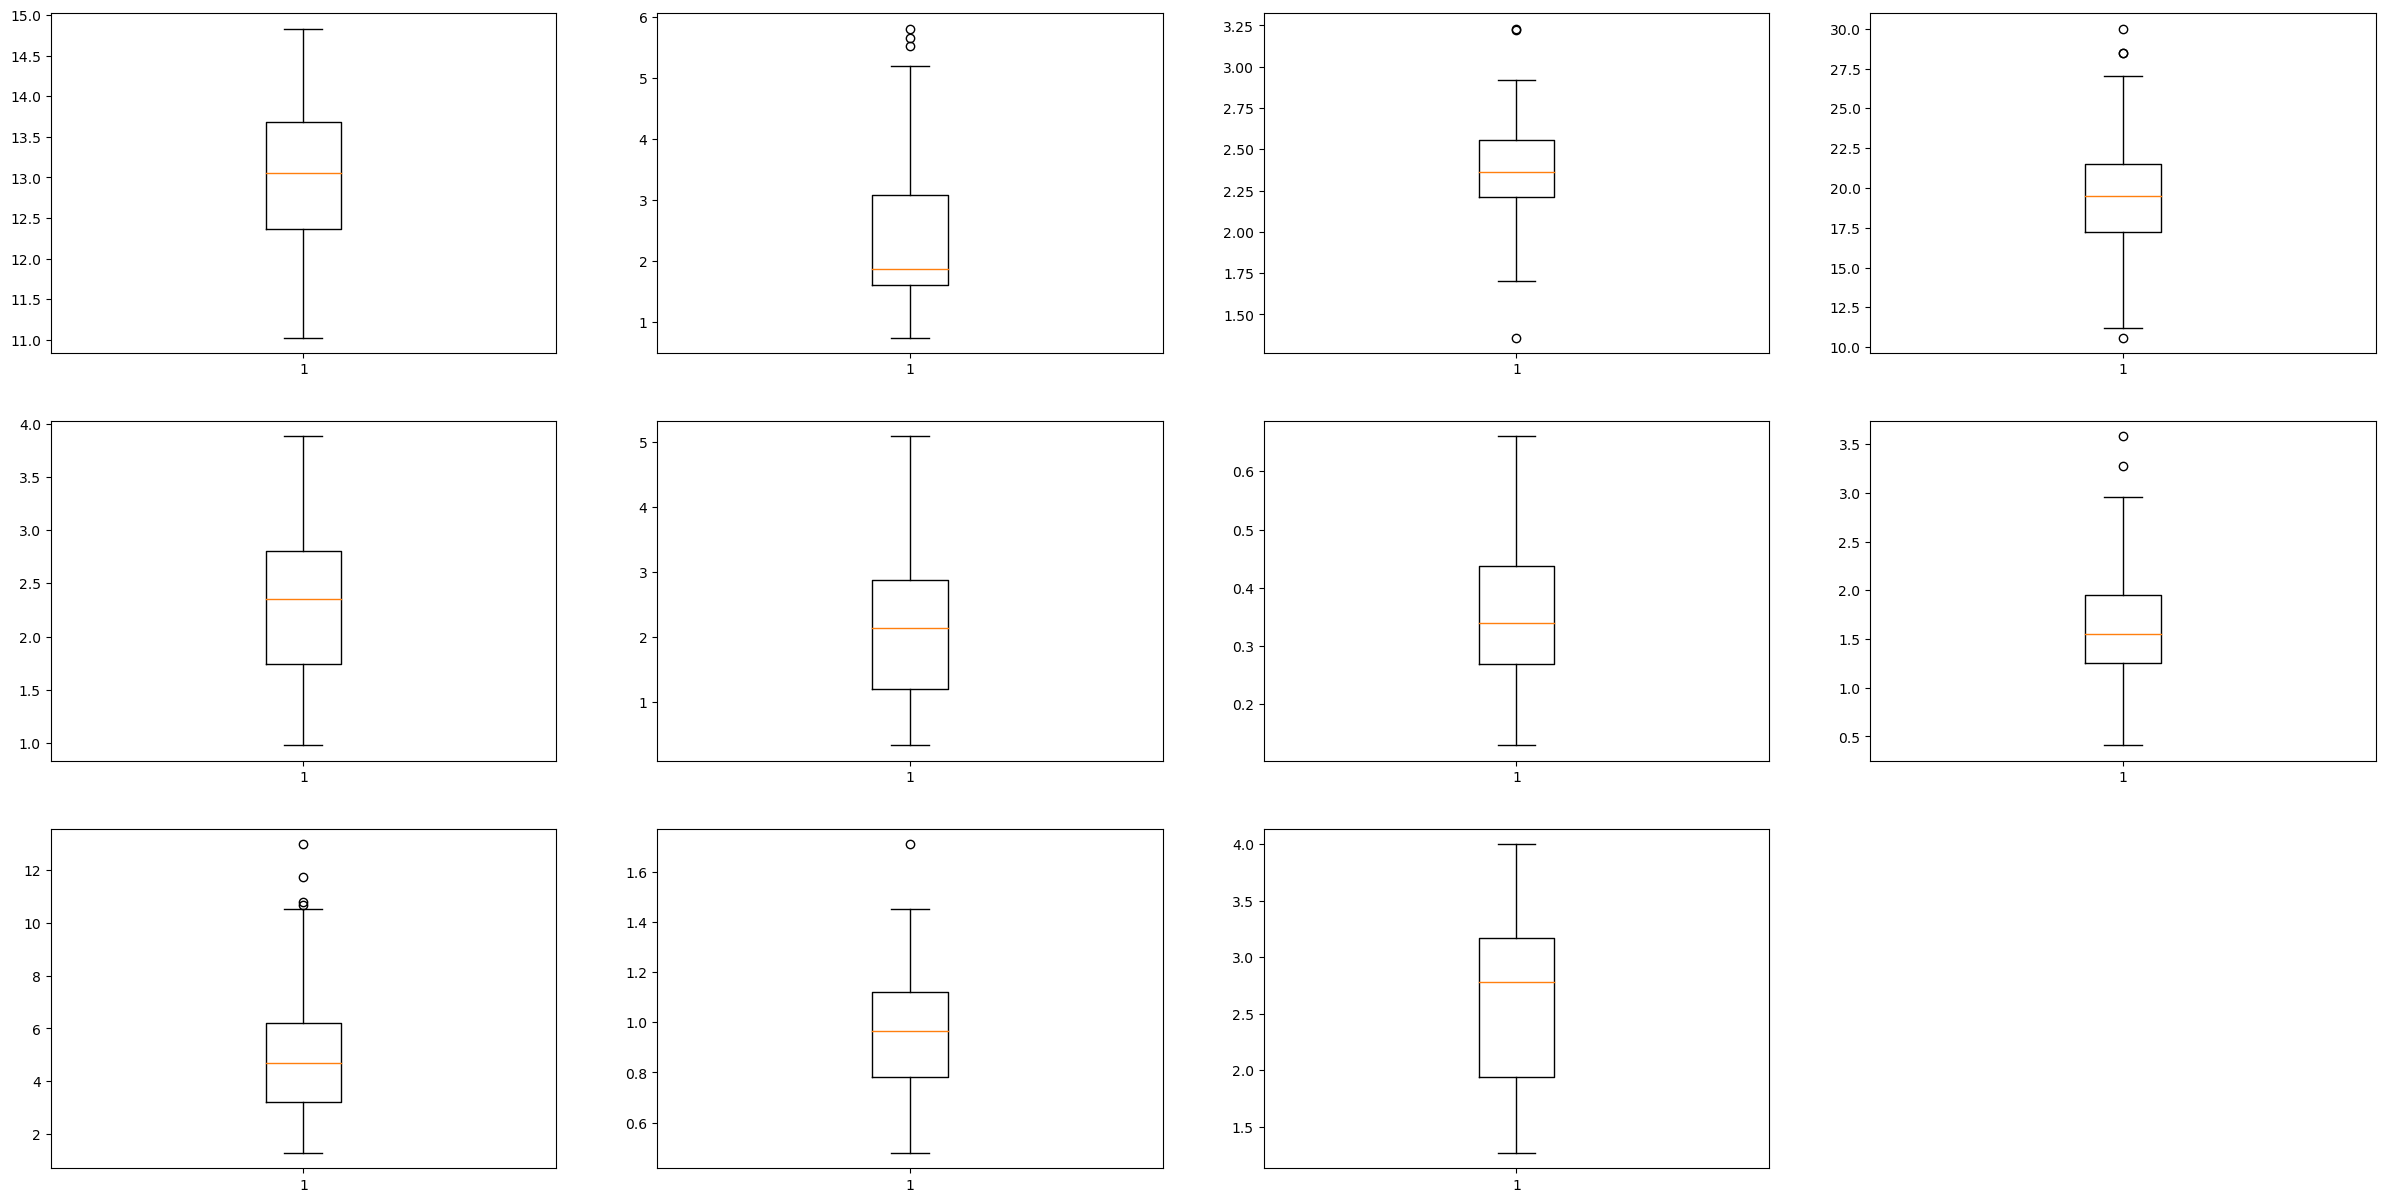

In [9]:
plt.figure(figsize = (30,15))
m = 1
for i in continous:
    plt.subplot(3,4,m)
    plt.boxplot(x = df[i])
    m += 1

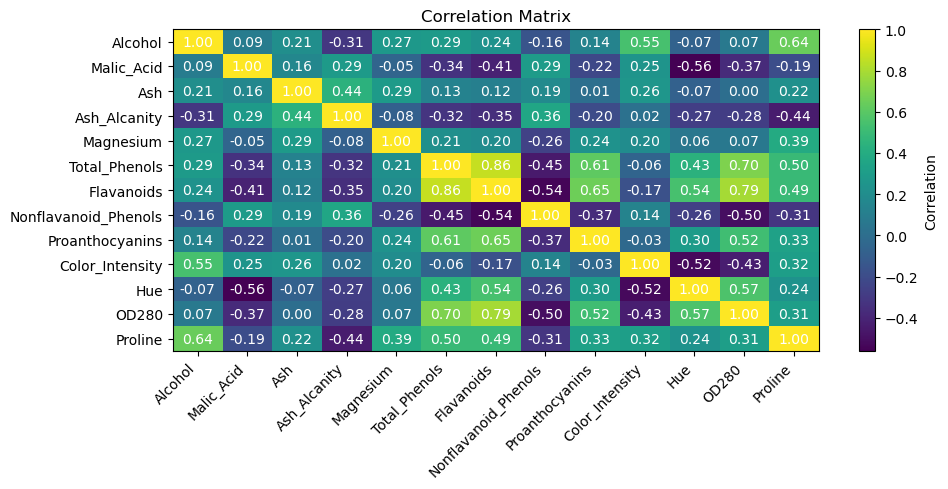

In [10]:
plt.figure(figsize=(10, 5))
plt.imshow(df.corr(), cmap='viridis', aspect='auto')

# Add annotations
for i in range(len(df.columns)):
    for j in range(len(df.columns)):
        plt.text(j, i, "{:.2f}".format(df.corr().iloc[i, j]),
                 ha='center', va='center', color='white')

# Add colorbar
plt.colorbar(label='Correlation')

# Set labels
plt.xticks(ticks=range(len(df.columns)), labels=df.columns, rotation=45, ha='right')
plt.yticks(ticks=range(len(df.columns)), labels=df.columns)

plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

### Checking for Missing Values and Duplicates

In [11]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.skew()

Alcohol                -0.051482
Malic_Acid              1.039651
Ash                    -0.176699
Ash_Alcanity            0.213047
Magnesium               1.098191
Total_Phenols           0.086639
Flavanoids              0.025344
Nonflavanoid_Phenols    0.450151
Proanthocyanins         0.517137
Color_Intensity         0.868585
Hue                     0.021091
OD280                  -0.307285
Proline                 0.767822
dtype: float64

### Handling Outliers

In [14]:
outliers_index = []
for i in continous:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        ll = Q1 -1.5*IQR
        ul = Q3+1.5*IQR
        if len(df[(df[i] < ll) | (df[i] > ul)]) > 0:
             outliers_index.append(df[(df[i] < ll) | (df[i] > ul)].index.to_list())
print(*outliers_index)

[123, 137, 173] [25, 59, 121] [59, 73, 121, 127] [95, 110] [151, 158, 159, 166] [115]


In [15]:
df = df.drop([123, 137, 173,25, 59, 121,59, 73, 121, 127,95, 110,151, 158, 159,115],axis = 0)

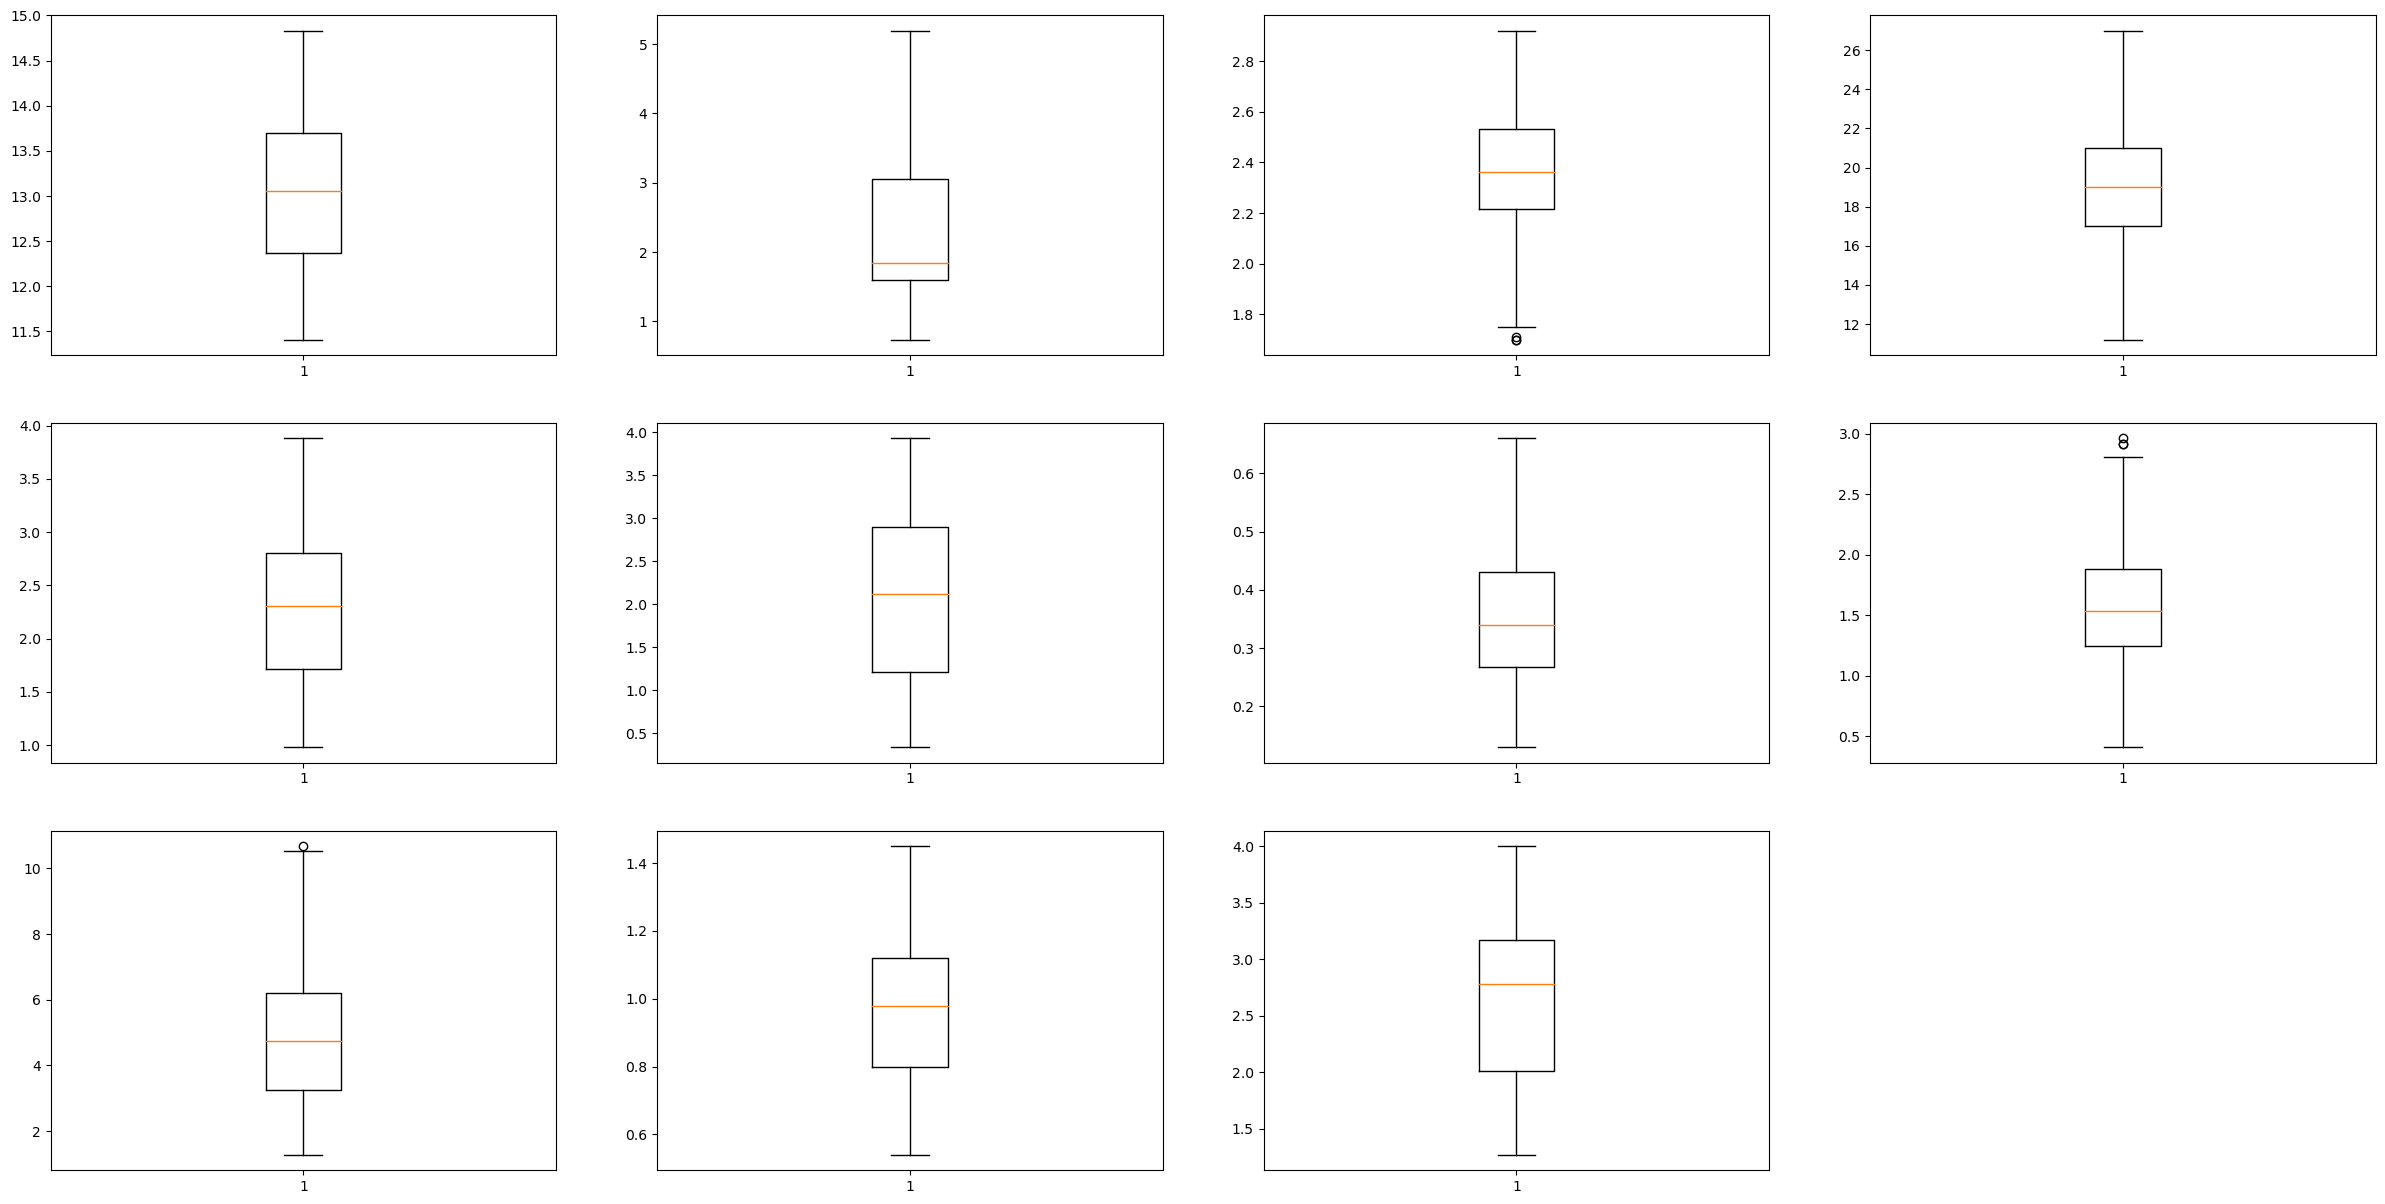

In [16]:
plt.figure(figsize = (30,15))
m = 1
for i in continous:
    plt.subplot(3,4,m)
    plt.boxplot(x = df[i])
    m += 1

In [17]:
discrete_count = [i for i in df.columns if df[i].dtypes == 'int64']

In [18]:
discrete_count

['Magnesium', 'Proline']

In [19]:
outliers_index = []
for i in discrete_count:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        ll = Q1 -1.5*IQR
        ul = Q3+1.5*IQR
        if len(df[(df[i] < ll) | (df[i] > ul)]) > 0:
             outliers_index.append(df[(df[i] < ll) | (df[i] > ul)].index.to_list())
print(*outliers_index)

[69, 78]


In [20]:
df = df.drop([69,78],axis = 0)

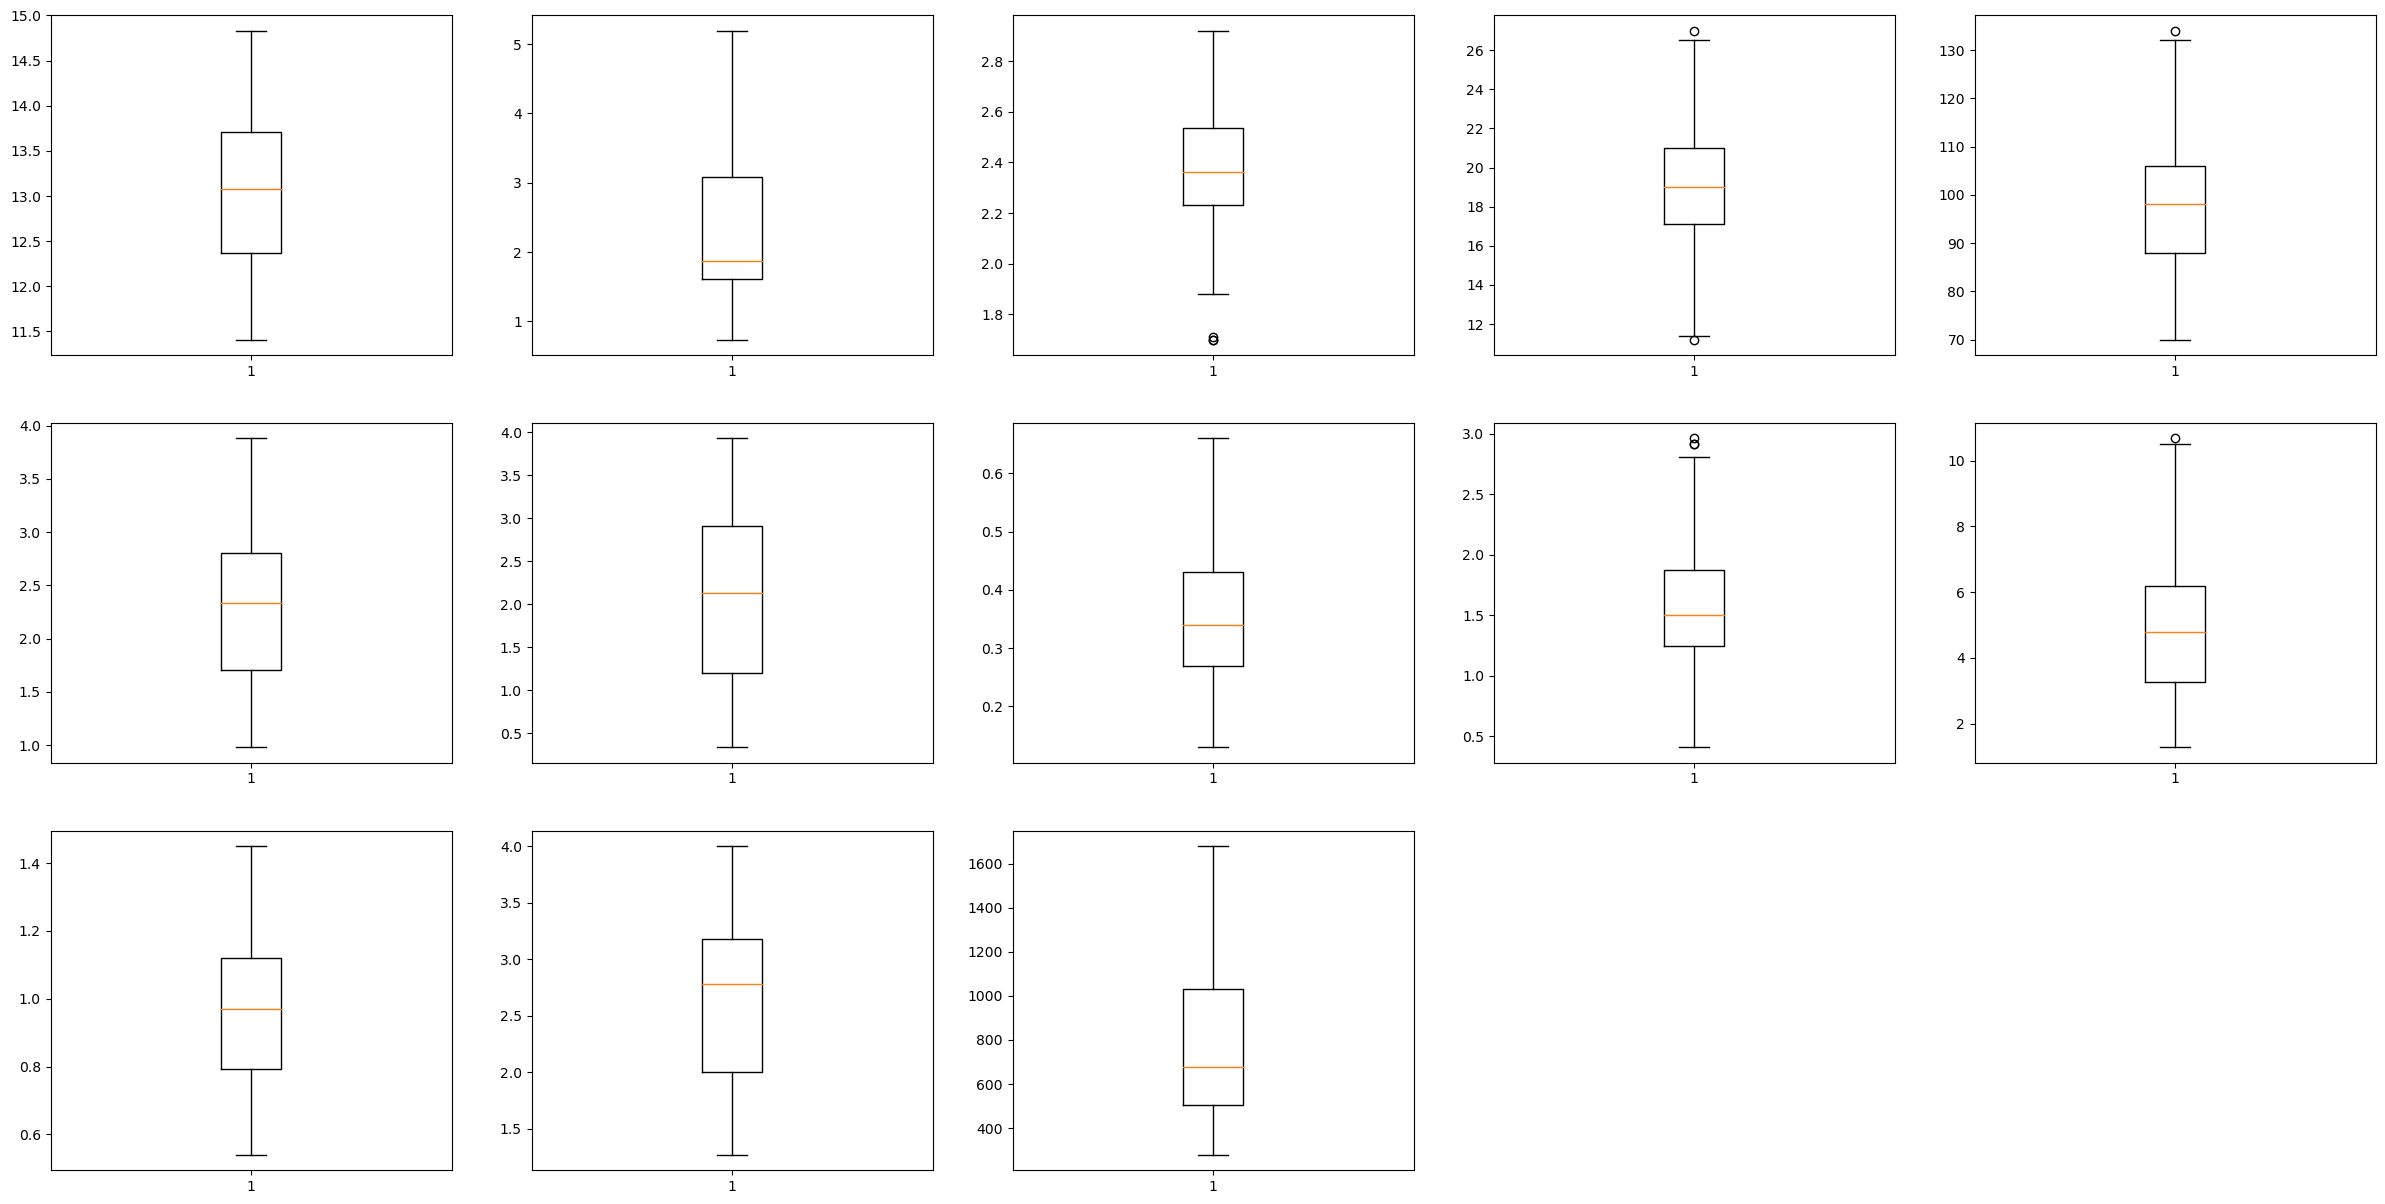

In [21]:
plt.figure(figsize = (30,15))
m = 1
for i in df.columns:
    plt.subplot(3,5,m)
    plt.boxplot(x = df[i])
    m += 1

### Normality

In [22]:
df.skew()

Alcohol                -0.040657
Malic_Acid              0.871948
Ash                    -0.226848
Ash_Alcanity            0.021026
Magnesium               0.482769
Total_Phenols           0.094158
Flavanoids             -0.118522
Nonflavanoid_Phenols    0.508741
Proanthocyanins         0.333681
Color_Intensity         0.650546
Hue                    -0.132441
OD280                  -0.347129
Proline                 0.703333
dtype: float64

### Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df = pd.DataFrame(sc.fit_transform(df),columns = df.columns)

In [24]:
X = df

### Hypertuning

In [25]:
wcss = []
for i in range(1,9):
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters = i,init = "k-means++",random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
print(wcss)

[2105.9999999999995, 1458.988516682958, 1084.516528192465, 1001.1516065309296, 943.5091996161073, 897.4974874043587, 844.9374208985685, 802.4366772277203]


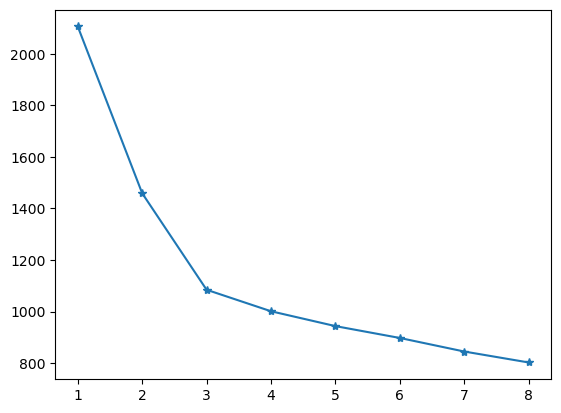

In [26]:
plt.plot(range(1,9),wcss,marker = '*')
plt.xticks(range(1,9))
plt.show()

#### Observation
from the point 3 : it started flattening so n_clusters = 3

### Modeling

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3,init = "k-means++")
X['category'] = kmeans.fit_predict(X)

In [28]:
X.sample(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,category
147,-0.243087,0.911307,0.895269,0.911613,0.599385,-1.010440,-1.460968,1.992128,-1.124141,0.246850,-0.407770,-0.721830,-0.586256,0
161,1.369920,1.703691,1.560751,1.742030,-0.211813,-0.375670,-1.298283,1.662059,-0.377942,1.930138,-1.606658,-1.440528,-0.617322,0
39,0.651628,-0.577994,-0.227733,-1.014954,1.491702,1.369947,1.274181,-0.153319,1.516255,0.502598,-0.038881,1.067869,0.112718,1
43,0.008946,-0.520713,-1.101178,-0.749220,0.680505,1.131908,0.979314,-0.648422,0.923123,-0.004248,-0.361659,1.025593,0.392308,1
95,-0.558127,-0.931225,-1.933031,-0.250970,-0.860771,-1.327825,-0.688212,-0.565905,-0.377942,-1.208589,0.376118,0.208250,-0.611109,2


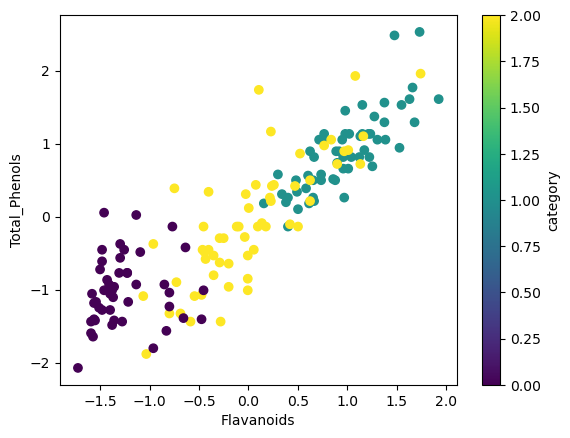

In [29]:
corr_matrix = df.corr()

# Find the pair of columns with the highest correlation
highest_corr = corr_matrix.unstack().sort_values(ascending=False)
highest_corr_pair = highest_corr[(highest_corr < 1)].index[0]

plt.scatter(df[highest_corr_pair[0]], df[highest_corr_pair[1]], c=df['category'], cmap='viridis')
plt.xlabel(highest_corr_pair[0])
plt.ylabel(highest_corr_pair[1])
plt.colorbar(label='category')
plt.show()